In [1]:
# tensorflow imports
import tensorflow as tf
from tensorflow import keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


# Import Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# labels in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore data

In [4]:
train_images.shape # 60000 training images, each is 28x28

(60000, 28, 28)

In [5]:
len(train_labels) # 60000 train labels

60000

In [6]:
train_labels # each label is number between 0 - 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape # 10000 training images, each is 28x28

(10000, 28, 28)

In [8]:
len(test_labels) # 10000 test labels

10000

# Preprocess data

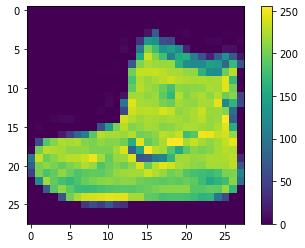

In [9]:
# plot a raw image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# raw pixel is between 0 - 255, scale to between 0 - 1
train_images = train_images / 255.0
test_images = test_images / 255.0

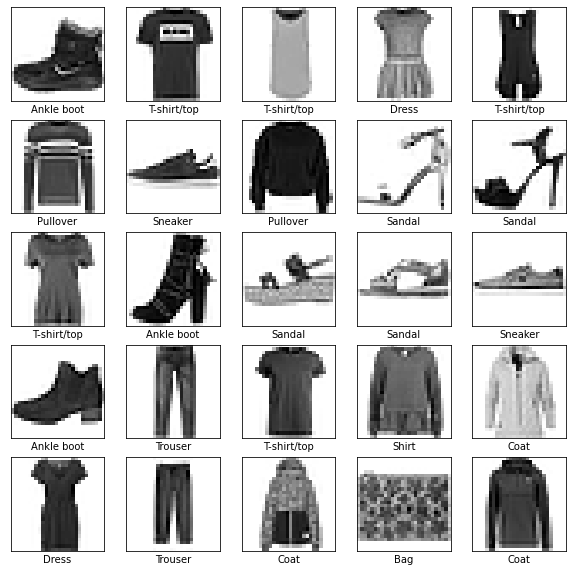

In [11]:
# check that the images have been normalized, plot 25 samples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1) # nrows, ncolumns, index
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# Build model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # flat image to 1D
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10) # 10 logits, one for each label
])

In [13]:
# compile model
# cost function, optimizer, eval metrics are added during compilation
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

# Train

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5004 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3753 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3368 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3140 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2970 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2839 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2701 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2485 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.241

# Evaluate

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3245 - accuracy: 0.8844

Test accuracy: 0.8844000101089478


# Predict

In [16]:
# add a softmax layer to the logits to change the probability
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [17]:
# the probability for each label for sample 0
predictions[0]

array([1.0415334e-08, 2.2895094e-08, 1.2378806e-08, 5.5182358e-08,
       3.0772654e-08, 1.0808882e-03, 4.5528532e-07, 1.8053656e-02,
       1.6527748e-06, 9.8086321e-01], dtype=float32)

In [18]:
# max to get the predicted label
np.argmax(predictions[0])

9

In [19]:
test_labels[0]  # same as true label

9

In [20]:
# functions for plotting

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

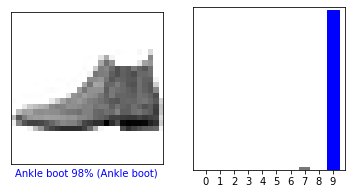

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

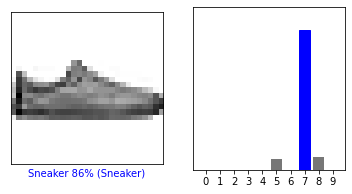

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

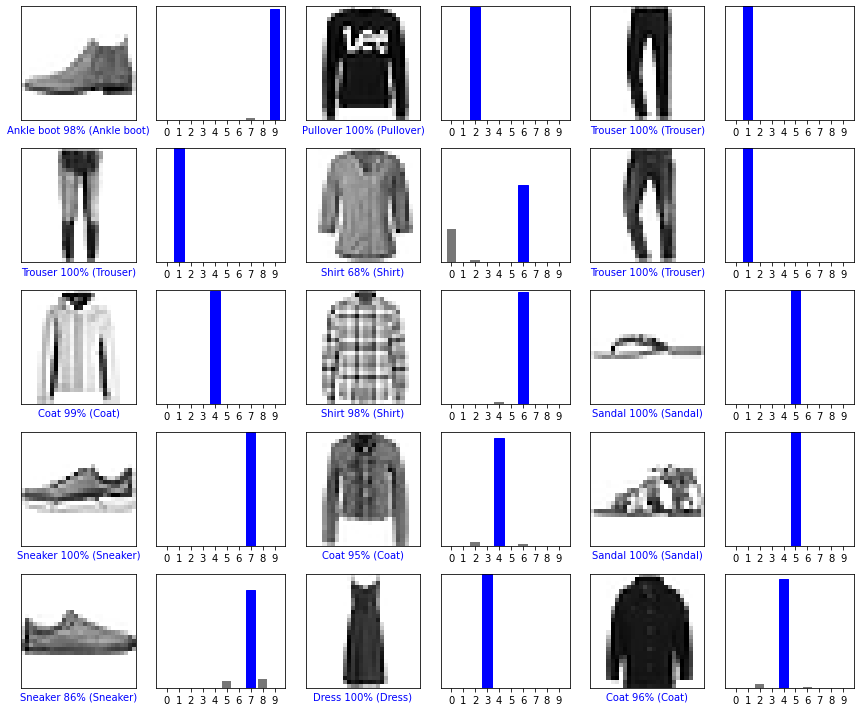

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()